In [5]:
import seaborn as sns
import matplotlib.pyplot as plt 
import pandas as pd 
# !gdown https://raw.githubusercontent.com/rasbt/python-machine-learning-book-2nd-edition/master/code/ch10/housing.data.txt
df = pd.read_csv('https://raw.githubusercontent.com/rasbt/python-machine-learning-book-2nd-edition/master/code/ch10/housing.data.txt',sep='\s+')
df.columns = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']
df.head()

cols = ['LSTAT','INDUS','NOX','RM','MEDV']

<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Ruchi\AppData\Local\Temp\ipykernel_2920\678787478.py:5: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv('https://raw.githubusercontent.com/rasbt/python-machine-learning-book-2nd-edition/master/code/ch10/housing.data.txt',sep='\s+')


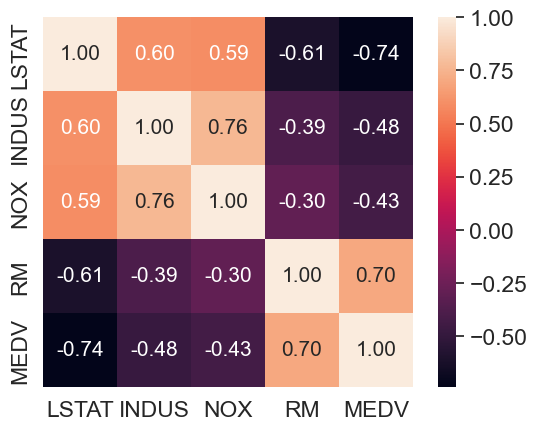

In [6]:
import numpy as np
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm,cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size' : 15},yticklabels=cols,xticklabels=cols)
plt.show()

[[9,12],[1,10],[4,11],[8,12],[3,9],[6,9],[6,7]]
1,10    3,9     4,11    6,9     6,7     8,12    9,12

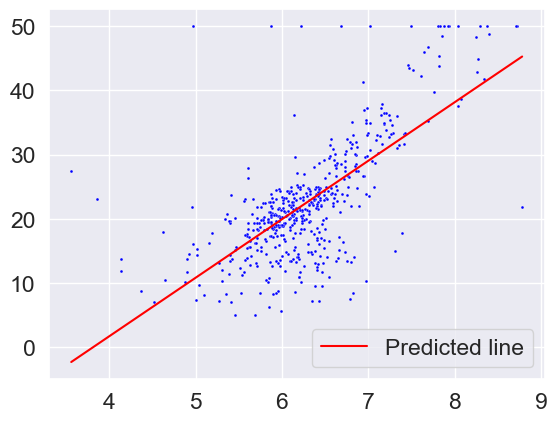

In [14]:
x = df[['RM']].values
y = df[['MEDV']].values
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x,y)
lr.intercept_
sns.scatterplot(x=x.ravel(),y=y.ravel(),color="blue",s=4.5)
sns.lineplot(x=x.ravel(),y=lr.predict(x).ravel(),color="red",label="Predicted line")
plt.show()

In [21]:
from sklearn.model_selection import train_test_split as tt 
X = df.iloc[:,:-1].values 
Y = df['MEDV'].values 
xtrain,xtest,ytrain,ytest = tt(X,Y,test_size=0.2)
lr = LinearRegression()
lr.fit(xtrain,ytrain)

ytrain_pred = lr.predict(xtrain)
ytest_pred = lr.predict(xtest)
from sklearn.metrics import mean_squared_error , r2_score
print('MSE train : %.3f,test : %.3f'%(mean_squared_error(ytrain,ytrain_pred),mean_squared_error(ytest,ytest_pred)))
print('R^2 train : %.3f,test : %.3f'%(r2_score(ytrain,ytrain_pred),r2_score(ytest,ytest_pred)))


TypeError: not enough arguments for format string